### How does SVM work?

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

 - Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes  
   black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two    classes correctly.

 - Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand    side figure.

<img src="image.png"/>

Source : https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
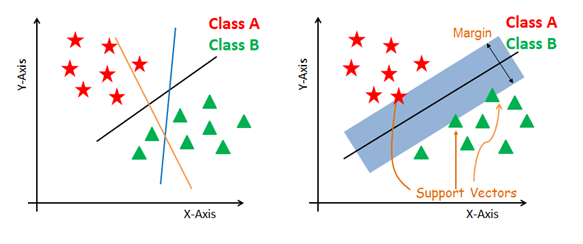

In [33]:
# import librairies
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [34]:
# dataset - train set
X = np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]])
y = np.array([-1,-1, -1, 1, 1 , 1 ])

In [35]:
# SVM model and training
clf = SVC(kernel = 'linear')
clf.fit(X, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
# print training results ad model parameters
print('w = ', clf.coef_)
print('b = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors =  [2 3]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


In [37]:
# calculating the value of : W.X + b = [[ 0.25 -0.25]] . [[2, 5]] + [-0.75]
print(clf.decision_function([[2, 5]]))

[-1.5]


In [38]:
# which is equivalet to
w_ = np.array([0.25, -0.25]) 
x_ = np.array([2,5]) 
b_ = -0.75
print(np.dot(w_,x_) + b_)

-1.5


In [39]:
# predicting the class of (X1, X2) = [2, 5]
print(clf.predict([[2, 5]]))

[-1]


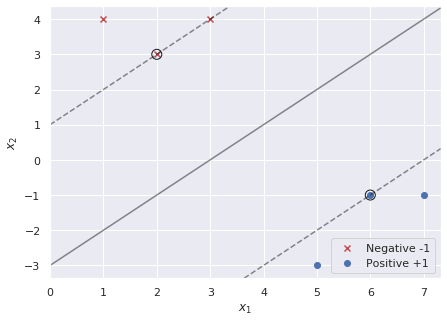

In [40]:
# plot decison boundries and support vectors

fig = plt.figure(figsize = (7,5))
plt.scatter(X[:3,0], X[:3,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(X[3:,0], X[3:,1], marker = 'o', color = 'b',label = 'Positive +1')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(0, xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

#Labels, legend, and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')

plt.show()

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# test set
X_test = [[0,4], [4, 0], [3,4], [3,5], [3, 1]]
y_test = [-1, 1, -1, -1, 1]

y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [42]:
# Model Precision 
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 0.5
